# Linear Regression

Linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). It follows the formula: $$\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$$

where: $y$ is the dependent variable, $x_1, x_2, ..., x_n$ are the independent variables, $\beta_0, \beta_1, \beta_2, ..., \beta_n$ are the coefficients, and $\epsilon$ is the error term.

This is simplified into 

$$\hat{y} = w \cdot X + b$$

where $w$ is the weight vector, $X$ is the feature vector, and $b$ is the bias.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
np.random.seed(1337)
X, y = np.random.randn(50, 1), np.random.randn(50)

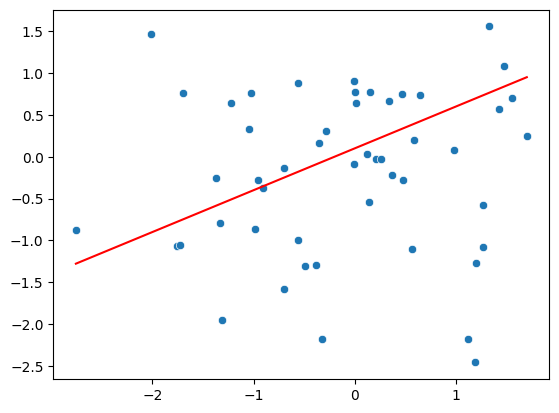

In [43]:
sns.scatterplot(x=X.flatten(), y=y)
# NOTE: these values are just for plotting purpose, the line here has no actual meaning
sns.lineplot(x=X.flatten(), y=0.5 * X.flatten() + 0.1, color='red')
plt.show()

## Goal

Approximate $w$ and $b$ such that the error is minimized.

## Cost Function

The cost function is the Mean Squared Error (MSE) which is defined as:

$$MSE = J(w, b) = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2$$

where $m$ is the number of samples.

In [45]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [46]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [86]:
X, y = datasets.make_regression(n_samples=200, n_features=4, noise=10, random_state=11)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [87]:
def plot(X, y):
    # plot all features of X with y
    fig, axs = plt.subplots(2, 2, figsize=(7, 7))
    for i in range(4):
        ax = axs[i // 2, i % 2]
        sns.scatterplot(x=X[:, i], y=y, ax=ax)
        ax.set_title(f'Feature {i}')
    plt.show()

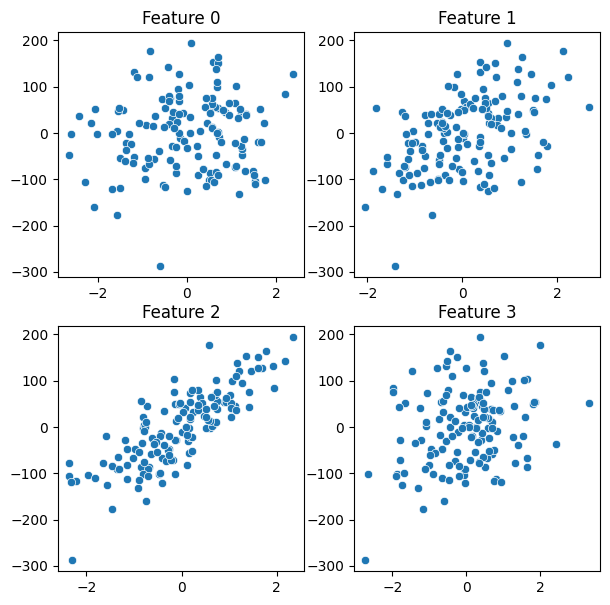

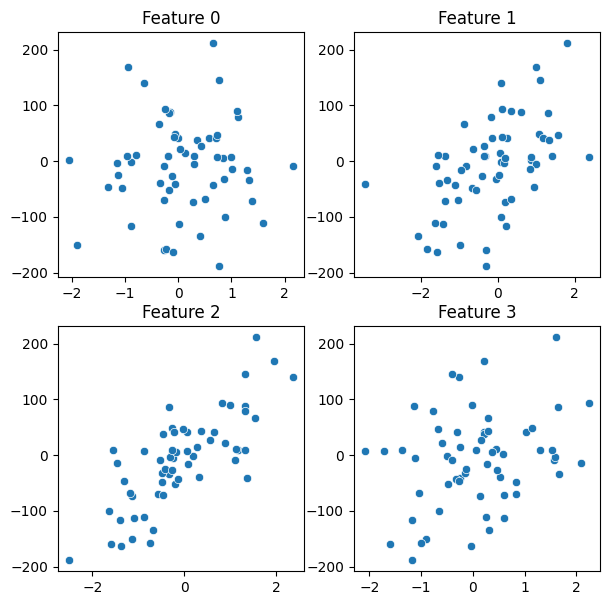

In [88]:
plot(X_train, y_train)
plot(X_test, y_test)

### Using scikit learn

In [89]:
lin_reg_sk = LinearRegression()
lin_reg_sk.fit(X_train, y_train)
y_pred_sk = lin_reg_sk.predict(X_test)

print(f'MSE (sklearn): {mse(y_test, y_pred_sk)}')

MSE (sklearn): 91.93732232059098


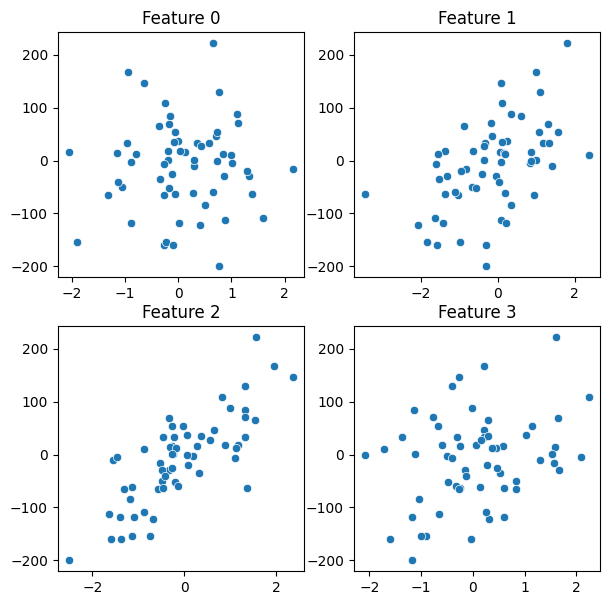

In [90]:
plot(X_test, y_pred_sk)

### Implementing Linear Regression

In [91]:
class LinearRegression:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        self.intercept_, self.coef_ = theta[0], theta[1:]

    def predict(self, X):
        return X.dot(self.coef_) + self.intercept_

In [92]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

print(f'MSE (custom): {mse(y_test, y_pred)}')

MSE (custom): 91.93732232059122


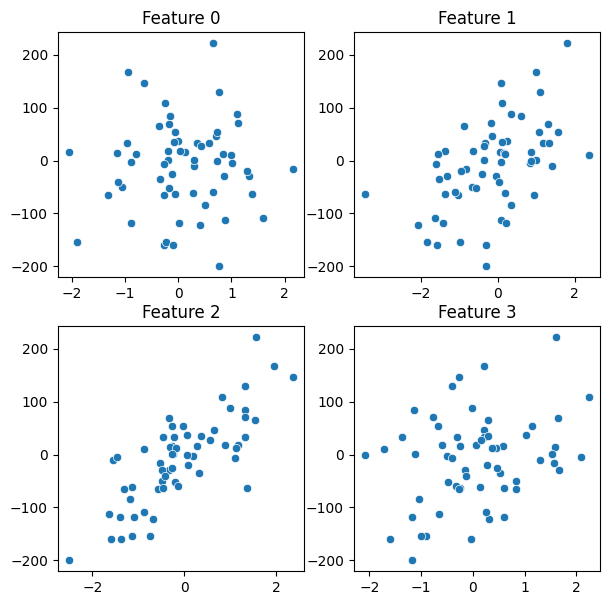

In [93]:
plot(X_test, y_pred)